In [2]:
import pandas as pd

imgatt = pd.read_csv('https://raw.githubusercontent.com/hjyoon02/hcmld21/main/Datasets/image_attribute_labels.txt',
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                     usecols=[0,1,2], names=['imgid', 'attid', 'present'])

In [3]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [4]:
imgatt.shape

(3677856, 3)

In [5]:
# need to reorganize imgatt to have one row per imgid, and 312 columns (one column per attribute),
# with 1/0 in each cell representing if that imgid has that attribute or not

imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')

In [6]:
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [7]:
imgatt2.shape

(11788, 312)

In [8]:
imglabels = pd.read_csv('https://raw.githubusercontent.com/hjyoon02/hcmld21/main/Datasets/image_class_labels.txt',
                        sep=' ', header=None, names=['imgid', 'label'])

imglabels = imglabels.set_index('imgid')

In [9]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


In [10]:
imglabels.shape

(11788, 1)

In [11]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)

In [12]:
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [13]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2555,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2826,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
3390,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
6327,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [14]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [16]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [17]:
print(clf.predict(df_train_att.head()))

[ 45  49  59  43 109]


In [18]:
clf.score(df_test_att, df_test_label)

0.441921858500528

In [20]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [21]:
cm

array([[ 7,  1,  5, ...,  0,  0,  0],
       [ 1, 10,  0, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  7,  0],
       [ 0,  0,  0, ...,  0,  0, 16]])

In [22]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  # for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  #   plt.text(j, i, format(cm[i, j], fmt),
  #            horizontalalignment='center',
  #            color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  

In [23]:
birds = pd.read_csv('https://raw.githubusercontent.com/hjyoon02/hcmld21/main/Datasets/classes.txt',
                    sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

Normalized confusion matrix
[[0.5  0.05 0.   ... 0.   0.   0.  ]
 [0.   0.72 0.   ... 0.   0.   0.  ]
 [0.26 0.   0.26 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.11 0.   0.  ]
 [0.05 0.   0.   ... 0.   0.29 0.  ]
 [0.   0.   0.   ... 0.   0.   0.73]]


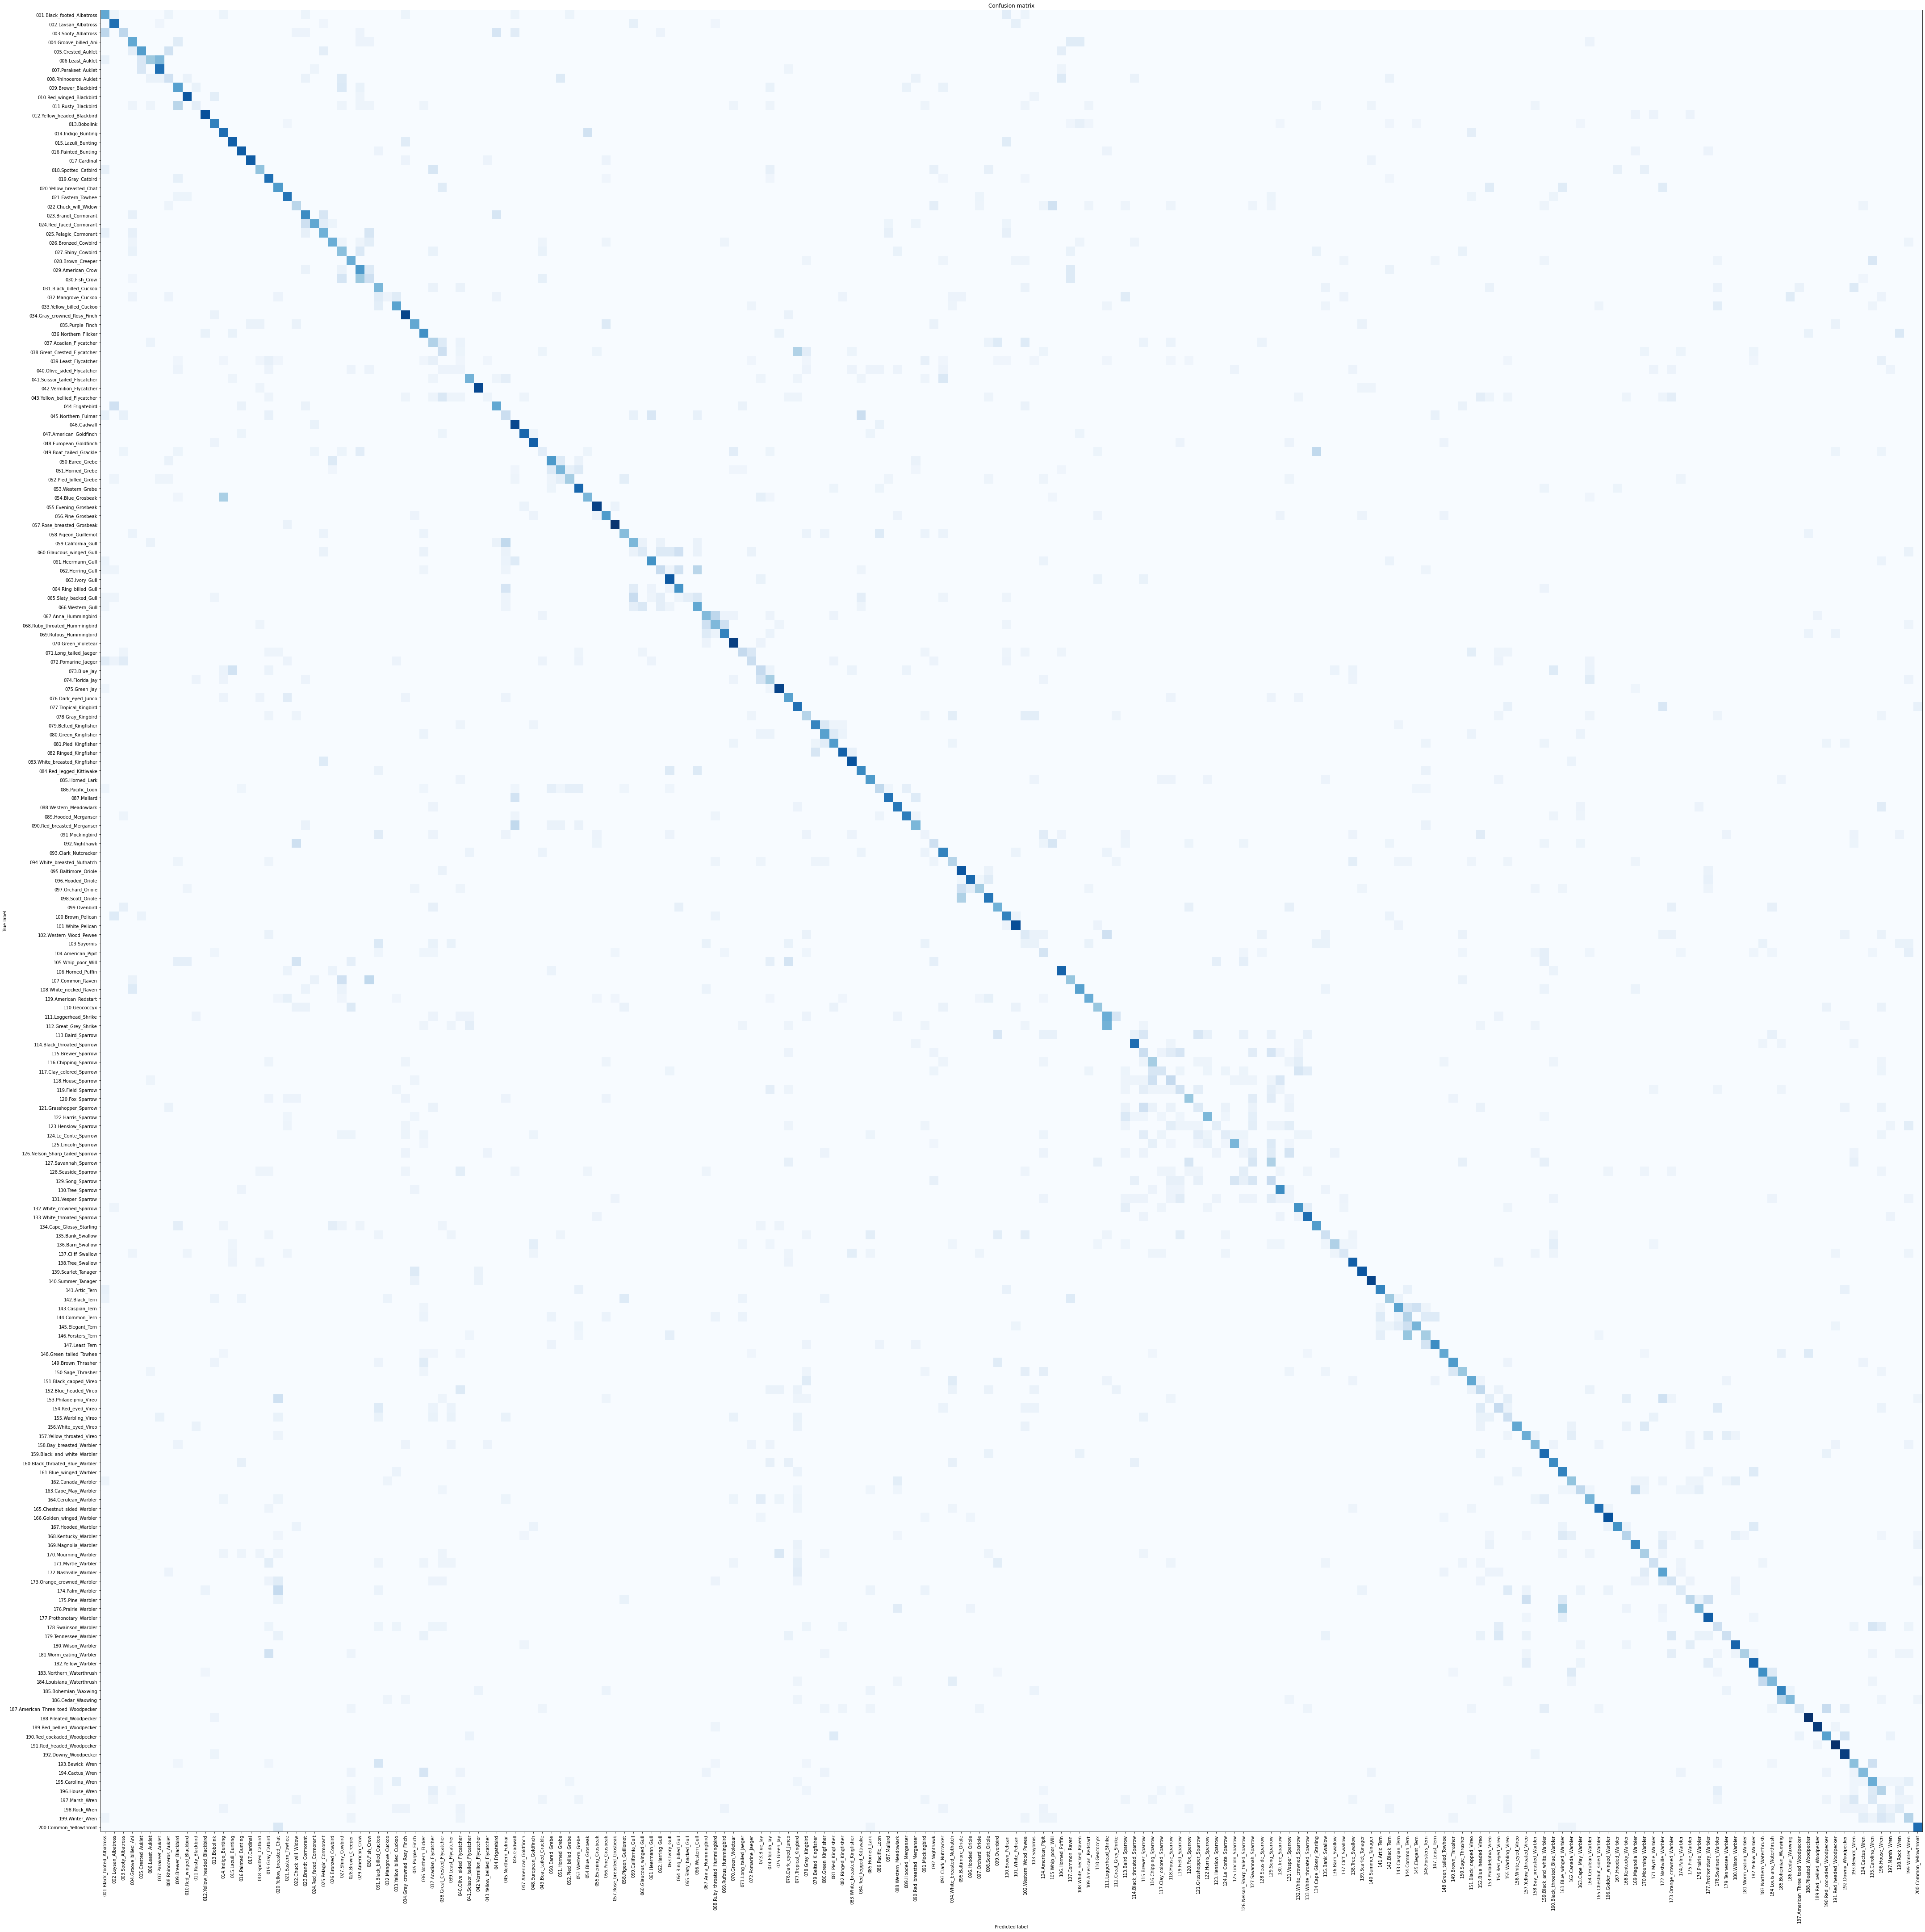

In [23]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=72)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

In [24]:
# sparse matrix
# source: https://machinelearningmastery.com/sparse-matrices-for-machine-learning/
from scipy.sparse import csr_matrix
S = csr_matrix(cm)
print(S)

  (0, 0)	10
  (0, 1)	1
  (0, 7)	1
  (0, 13)	1
  (0, 22)	1
  (0, 33)	1
  (0, 45)	1
  (0, 51)	1
  (0, 99)	2
  (0, 101)	1
  (1, 1)	18
  (1, 6)	1
  (1, 24)	1
  (1, 58)	2
  (1, 67)	1
  (1, 100)	2
  (2, 0)	5
  (2, 2)	5
  (2, 21)	1
  (2, 22)	1
  (2, 28)	1
  (2, 43)	3
  (2, 45)	2
  (2, 61)	1
  (3, 3)	9
  :	:
  (197, 141)	1
  (197, 154)	1
  (197, 191)	1
  (197, 192)	1
  (197, 193)	1
  (197, 195)	2
  (197, 196)	1
  (197, 197)	2
  (198, 0)	1
  (198, 27)	1
  (198, 39)	1
  (198, 101)	1
  (198, 103)	1
  (198, 104)	1
  (198, 148)	1
  (198, 193)	2
  (198, 194)	1
  (198, 195)	3
  (198, 196)	2
  (198, 198)	6
  (199, 19)	3
  (199, 84)	1
  (199, 160)	1
  (199, 161)	1
  (199, 199)	16


In [25]:
cm.shape

(200, 200)

In [26]:
S.shape

(200, 200)

In [27]:
type(S)

scipy.sparse.csr.csr_matrix

In [28]:
# np.set_printoptions(precision=2)
# plt.figure(figsize=(60,60), dpi=72)
# plot_confusion_matrix(S, classes=birds, normalize=True)
# plt.show()
# -> ValueError: shape too large to be a matrix.

In [29]:
# calculate sparsity of cm
from numpy import count_nonzero
sparsity = 1.0 - count_nonzero(cm) / cm.size
print(sparsity)

0.955525


In [24]:
# A simple decision tree
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.2713833157338965

In [25]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.4712249208025343

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.44 (+/- 0.01)


In [33]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.02)


In [34]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.01)


In [35]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
  for n_estimators in n_estimators_opts:
    clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
    scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
    rf_params[i,0] = max_features
    rf_params[i,1] = n_estimators
    rf_params[i,2] = scores.mean()
    rf_params[i,3] = scores.std() * 2
    i += 1
    print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
          (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.02)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.02)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.01)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.00)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.01)
Max features: 5, num estimators: 130, accuracy: 0.43 (+/- 0.01)
Max features: 5, num estimators: 150, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 170, accuracy: 0.44 (+/- 0.01)
Max features: 5, num estimators: 190, accuracy: 0.44 (+/- 0.01)
Max features: 10, num estimators: 10, accuracy: 0.29 (+/- 0.01)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.01)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.02)
Max features: 10, num estimators: 70, accuracy: 0.43 (+/- 0.02)
Max features: 10, num estimators: 90, accuracy: 0.43 (+/- 0.01)
Max features: 10, num estimators: 110, accura

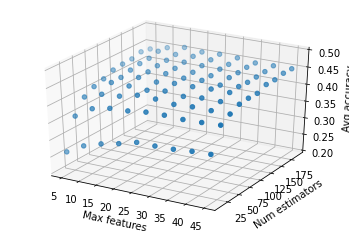

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()

# 3.2
cv of the 'cross_val_score' function means the 'K' of the K-fold cross validation. For K-fold cross validation, data is devided into k subsets. One of them is test set and others belong to training set. Then the number of cases of (training set, test set) is k. K-fold cross validation's score is the average of scores of k cases. The cross varidation reduces score error due to biased data dividing.
The bigger cv, the more reliable accuracy. But the standard deviation becomes higher, because each model of k-fold cross validation has a small test set, thereby accuracy of each model is biased.

In [27]:
scores2 = cross_val_score(clf, df_train_att, df_train_label, cv=2)
print("cv: 2, Accuracy: %0.5f (+/- %0.5f)" % (scores2.mean(), scores2.std() * 2))
scores3 = cross_val_score(clf, df_train_att, df_train_label, cv=3)
print("cv: 3, Accuracy: %0.5f (+/- %0.5f)" % (scores3.mean(), scores3.std() * 2))
scores5 = cross_val_score(clf, df_train_att, df_train_label, cv=5)
print("cv: 5, Accuracy: %0.5f (+/- %0.5f)" % (scores5.mean(), scores5.std() * 2))
scores7 = cross_val_score(clf, df_train_att, df_train_label, cv=7)
print("cv: 7, Accuracy: %0.5f (+/- %0.5f)" % (scores7.mean(), scores7.std() * 2))
scores9 = cross_val_score(clf, df_train_att, df_train_label, cv=9)
print("cv: 9, Accuracy: %0.5f (+/- %0.5f)" % (scores9.mean(), scores9.std() * 2))
scores20 = cross_val_score(clf, df_train_att, df_train_label, cv=20)
print("cv: 20, Accuracy: %0.5f (+/- %0.5f)" % (scores20.mean(), scores20.std() * 2))

cv: 2, Accuracy: 0.41237 (+/- 0.00375)
cv: 3, Accuracy: 0.43612 (+/- 0.01034)
cv: 5, Accuracy: 0.44112 (+/- 0.01484)
cv: 7, Accuracy: 0.44025 (+/- 0.01632)
cv: 9, Accuracy: 0.44688 (+/- 0.02312)
cv: 20, Accuracy: 0.44562 (+/- 0.04916)


# 3.3
'precomputed' is not applicable because precomputed matrix must be a square matrix but our data is a 8000x312 matrix. Linear, poly, rbf, sigmoid are applicable.
Because the kernel shape decides the boundary line of deviding data into two groups, the accuracy is different according to the kernel shape. In the case of birds data, rbf(default) makes the model which have the highest accuracy. Accuracy is higher in order of rbf(0.47), linear(0.46), sigmoid(0.45), poly(0.44).

In [31]:
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
print("kernel: default, score: ", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(kernel='linear')
clfsvm.fit(df_train_att, df_train_label)
print("kernel: linear, score: ", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(kernel='poly')
clfsvm.fit(df_train_att, df_train_label)
print("kernel: poly, score: ", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(kernel='rbf')
clfsvm.fit(df_train_att, df_train_label)
print("kernel: rbf, score: ", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(kernel='sigmoid')
clfsvm.fit(df_train_att, df_train_label)
print("kernel: sigmoid, score: ", clfsvm.score(df_test_att, df_test_label))

# clfsvm = svm.SVC(kernel='precomputed')
# clfsvm.fit(df_train_att, df_train_label)
# print("kernel: linear, score: ", clfsvm.score(df_test_att, df_test_label))
# -> ValueError: Precomputed matrix must be a square matrix. Input is a 8000x312 matrix.

kernel: default, score:  0.4712249208025343
kernel: linear, score:  0.455649419218585
kernel: poly, score:  0.4421858500527983
kernel: rbf, score:  0.4712249208025343
kernel: sigmoid, score:  0.4516895459345301


# 3.4
The accuracy of dafault parameters is 0.4712249208025343.
When the parameter C is 2.0 and Gamma is default, its accuray is 0.48680042238648363, which is better than default.
I think I can improve the accuracy by iterative experiments. If I have more time, it will be good to draw graph according to C or Gamma, and to find the best option among them.

In [32]:
clfsvm = svm.SVC(C=0.01)
clfsvm.fit(df_train_att, df_train_label)
print("C=0.01:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=0.1)
clfsvm.fit(df_train_att, df_train_label)
print("C=0.1:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=0.5)
clfsvm.fit(df_train_att, df_train_label)
print("C=0.5:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
print("C=1.0 (default):", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0)
clfsvm.fit(df_train_att, df_train_label)
print("C=2.0:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=5.0)
clfsvm.fit(df_train_att, df_train_label)
print("C=5.0:", clfsvm.score(df_test_att, df_test_label))

C=0.01: 0.002903907074973601
C=0.1: 0.05570221752903907
C=0.5: 0.4229144667370644
C=1.0 (default): 0.4712249208025343
C=2.0: 0.48680042238648363
C=5.0: 0.4815205913410771


In [33]:
clfsvm = svm.SVC(C=2.0, gamma=1/2000)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/2000:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/1000)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/1000:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/500)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/500:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/312)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/312(1/n_features):", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/100)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/100:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/50)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/50:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/10)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/10:", clfsvm.score(df_test_att, df_test_label))

gamma=1/2000: 0.04197465681098205
gamma=1/1000: 0.19139387539598732
gamma=1/500: 0.34028511087645197
gamma=1/312 (default): 0.40760295670538543
gamma=1/100: 0.46858500527983105
gamma=1/50: 0.4786166842661035
gamma=1/10: 0.4461457233368532


In [34]:
clfsvm = svm.SVC(C=2.0, gamma=1/90)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/90:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/80)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/80:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/70)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/70:", clfsvm.score(df_test_att, df_test_label))

clfsvm = svm.SVC(C=2.0, gamma=1/60)
clfsvm.fit(df_train_att, df_train_label)
print("gamma=1/60:", clfsvm.score(df_test_att, df_test_label))

gamma=1/90: 0.4730728616684266
gamma=1/80: 0.47571277719112987
gamma=1/70: 0.4786166842661035
gamma=1/60: 0.48284054910242874
